In [37]:
from sklearn.linear_model import LinearRegression
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
scenario = "testing_last_year_results_electrolyzer10GW"

In [38]:
sns.set_theme(style="whitegrid")
#path_to_results = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ), "amiris_workflow", "2050example")
path_to_results = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ), "amiris_workflow" )
path_to_structure = os.path.join(path_to_results, "amiris_data_structure.xlsx")
path_to_load = os.path.join(path_to_results, "amiris-config", "data","load.csv")
path_to_h2_high = os.path.join(path_to_results, "amiris-config", "data","LS_hydrogen_high.csv")
path_to_h2_low = os.path.join(path_to_results, "amiris-config", "data","LS_hydrogen_low.csv")
path_to_industrial = os.path.join(path_to_results, "amiris-config", "data","LS_industrial.csv")
path_to_output = os.path.join(path_to_results, "output","amiris_results.csv" )
path_to_storage_levels = os.path.join(path_to_results, "output","final_storage_levels.csv" )
path_to_generation = os.path.join(path_to_results, "output","hourly_generation_per_group.csv" )
path_to_electricity_prices = os.path.join(path_to_results, "output","raw","EnergyExchangeMulti.csv" )

path_to_plots = os.path.join(os.getcwd(),  "Scenarios", "AMIRIS_Results", scenario )
if not os.path.exists(path_to_plots):
    os.makedirs(path_to_plots)
#-----------------------------------------------------------------------------
elec_prices_data = pd.read_csv(path_to_electricity_prices, sep=";")  
generation_data =  pd.read_csv(path_to_generation, index_col="Unnamed: 0")
load_data = pd.read_csv(path_to_load, sep=";", header=None) 
h2_low_data = pd.read_csv(path_to_h2_low, sep=";", header=None) 
h2_high_data = pd.read_csv(path_to_h2_high, sep=";", header=None) 
industrial_data = pd.read_csv(path_to_industrial, sep=";", header=None) 
results_data = pd.read_csv(path_to_output) 
storage_levels_data = pd.read_csv(path_to_storage_levels) 
storages_data = pd.read_excel(path_to_structure, sheet_name='storages', index_col=0)
conventionals_data = pd.read_excel(path_to_structure, sheet_name='conventionals', index_col=0)
renewables_data = pd.read_excel(path_to_structure, sheet_name='renewables', index_col=0)
electrolysers_data = pd.read_excel(path_to_structure, sheet_name='electrolysers', index_col=0)
biogas_data = pd.read_excel(path_to_structure, sheet_name='biogas', index_col=0)
load_shedders_data = pd.read_excel(path_to_structure, sheet_name='load_shedding', index_col=0)
# Why is the electrolysis_hydrogen_generation given in the load generation? I think that value is not needed. 


In [39]:
print("Conventionals " + str(conventionals_data["InstalledPowerInMW"].sum()/1000))
print("Renewables " + str(renewables_data["InstalledPowerInMW"].sum()/1000))
print("electrolysers " + str(electrolysers_data["PeakConsumptionInMW"].sum()/1000))
print("biogas " + str(biogas_data["InstalledPowerInMW"].sum()/1000))

Conventionals 17.555943
Renewables 109.499
electrolysers 11.775
biogas 0.0


In [40]:
electrolyser_capacity = h2_high_data[1][0] + h2_low_data[1][0] 
input_industrial_demand = industrial_data[1].sum()
input_hydrogen_demand = h2_low_data[1].sum() + h2_high_data[1].sum()
print(input_hydrogen_demand)
print(electrolyser_capacity*8760)

359781960.00000006
359781960.0


In [41]:
h2_low_data[1].sum()

251847372.00000006

In [42]:
windon = renewables_data[renewables_data["Set"] =="WindOn"]
print(windon["InstalledPowerInMW"].sum())
windoff = renewables_data[renewables_data["Set"] =="WindOff"]
print(windoff["InstalledPowerInMW"].sum())
PV = renewables_data[renewables_data["Set"] =="OtherPV"]
print(PV["InstalledPowerInMW"].sum())
ROR = renewables_data[renewables_data["Set"] =="RunOfRiver"]
print(ROR["InstalledPowerInMW"].sum())

12000
70000
27458
41


In [43]:
max_output_onshore = 2978
max_output_offshore = 4730
max_output_pv = 1059
max_output_ror = 2102
theoretical_max_offshore = max_output_offshore*windoff["InstalledPowerInMW"].sum()
theoretical_max_onshore = max_output_onshore*windon["InstalledPowerInMW"].sum()
theoretical_max_pv = max_output_pv*PV["InstalledPowerInMW"].sum()
theoretical_max_ror = max_output_ror*ROR["InstalledPowerInMW"].sum()
max_RES = theoretical_max_offshore + theoretical_max_onshore + theoretical_max_pv  + theoretical_max_ror


In [44]:
windon_join = pd.merge(windon, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
print(windon_join["PRODUCTION_IN_MWH"].sum()/1000000)
windoff_join = pd.merge(windoff, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
print(windoff_join["PRODUCTION_IN_MWH"].sum()/1000000)
PV_join = pd.merge(PV, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
print(PV_join["PRODUCTION_IN_MWH"].sum()/1000000)
ROR_join = pd.merge(ROR, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
print(ROR_join["PRODUCTION_IN_MWH"].sum()/1000000)

47.36628990338904
312.86030042751025
41.40998260884774
0.08619840000000002


In [45]:
conventionals_join = pd.merge(conventionals_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
storages_results = pd.merge(storages_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
electrolysers_results = pd.merge(electrolysers_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
renewables_results = pd.merge(renewables_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')


renewables_results.head()

,identifier,InstalledPowerInMW,OpexVarInEURperMWH,Set,SupportInstrument,FIT,Premium,Lcoe,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,CONSUMPTION_IN_MWH,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,20530300053,1000,0.0,OtherPV,NONE,-,-,-,0.0,5.524274e+07,NaN,1.508121e+06,5.524274e+07
1,20530300054,350,0.0,OtherPV,NONE,-,-,-,0.0,1.933496e+07,NaN,5.278423e+05,1.933496e+07
2,99990300002,350,0.0,OtherPV,NONE,-,-,-,0.0,1.933496e+07,NaN,5.278423e+05,1.933496e+07
3,11111111111,1,0.0,OtherPV,NONE,-,-,-,0.0,5.524274e+04,NaN,1.508121e+03,5.524274e+04
4,20491500051,41,0.0,RunOfRiver,NONE,-,-,-,0.0,3.870553e+06,NaN,8.619840e+04,3.870553e+06


In [46]:
hydrogen_price_limit   = load_shedders_data.loc[load_shedders_data['TimeSeries'] == "amiris-config/data/0hydrogen_high.csv", 'VOLL'].sum()
industrial_price_limit = load_shedders_data.loc[load_shedders_data['TimeSeries'] == "amiris-config/data/0industrial.csv", 'VOLL'].sum()

,VOLL,TimeSeries
Type,,
SHEDDING,60,amiris-config/data/LS_hydrogen_high.csv
SHEDDING,40,amiris-config/data/LS_hydrogen_low.csv
SHEDDING,4000,amiris-config/data/load.csv
SHEDDING,2000,amiris-config/data/LS_high.csv
SHEDDING,500,amiris-config/data/LS_low.csv


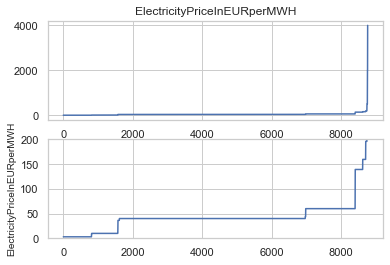

In [47]:

sorted_elec_prices = elec_prices_data["ElectricityPriceInEURperMWH"].copy()
fig, axes= plt.subplots(nrows=2, ncols=1)
axs1 = sorted_elec_prices.sort_values(ignore_index=True).plot(ax=axes[0])
plt.ylim([0, 200])
axs2 = sorted_elec_prices.sort_values(ignore_index=True).plot(ax=axes[1])
plt.ylabel('ElectricityPriceInEURperMWH', fontsize='small')
axes[0].set_title('ElectricityPriceInEURperMWH')
fig.savefig(path_to_plots + '/' + 'elec_prices.png', bbox_inches='tight', dpi=300)
load_shedders_data

In [48]:
load_generation = pd.concat([generation_data, 
                      load_data],   axis=1 )
load_generation.drop(0, axis=1, inplace=True) # dropping timeseries
load_generation.rename(columns={1: "load" }, inplace=True)
# load_generation.sort_values(by=1, inplace=True) # sorting by increasing load
# load_generation.reset_index(inplace=True )
#load_generation.drop("index", axis=1, inplace=True)
load_generation.drop("electrolysis_hydrogen_generation", axis=1, inplace=True)
load_generation.head()

,res,conventionals,storages_discharging,storages_charging,storages_aggregated_level,load_shedding,electrolysis_power_consumption,load
0,61049.253375,5663.943000,0.0,0.00000,0.000000,2.723982e+03,11775.0,14932.430871
1,62501.108885,5663.943000,0.0,0.00000,0.000000,1.039530e+03,11775.0,14722.821022
2,63918.459081,5072.579603,0.0,185.07151,166.564359,0.000000e+00,11775.0,14364.161782
3,67221.278573,1477.847053,0.0,185.07151,333.128718,-7.275958e-12,11775.0,14101.020113
4,68394.875477,384.427184,0.0,185.07151,499.693076,0.000000e+00,11775.0,14173.772082


In [49]:
load_generation["storages_charging"] = load_generation["storages_charging"]*-1
load_generation["electrolysis_power_consumption"] = load_generation["electrolysis_power_consumption"]*-1
load_generation.drop("storages_aggregated_level", axis=1, inplace=True)

In [50]:
RES_use = round((load_generation["res"].sum()/max_RES)*100,2)

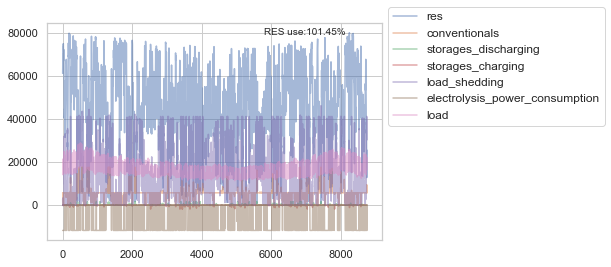

In [51]:
axs1= load_generation.plot(alpha=0.5)
plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
axs1.annotate("RES use:" + str(RES_use ) + "%",
               xy=(0.8, 0.8), xycoords='figure fraction',
               horizontalalignment='right', verticalalignment='bottom',
               fontsize='small')
fig1 = axs1.get_figure()
fig1.savefig(path_to_plots + '/' + 'testing.png', bbox_inches='tight', dpi=300)

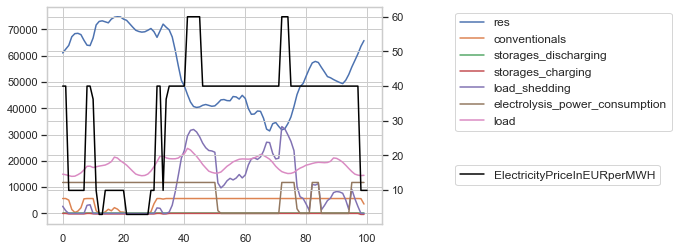

In [52]:
ElectricityPriceInEURperMWH = elec_prices_data["ElectricityPriceInEURperMWH" ]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
load_generation["electrolysis_power_consumption"] = load_generation["electrolysis_power_consumption"]*-1
load_generation.iloc[0:100,0:7].plot( ax=ax1)

ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2,    1))
ax2.plot(ElectricityPriceInEURperMWH.loc[0:100] , color = "black")
#ax2.set_ylim(-1000, 4100)
ax2.legend(['ElectricityPriceInEURperMWH'],fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 0.3))
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'timeseries.png', bbox_inches='tight', dpi=300)

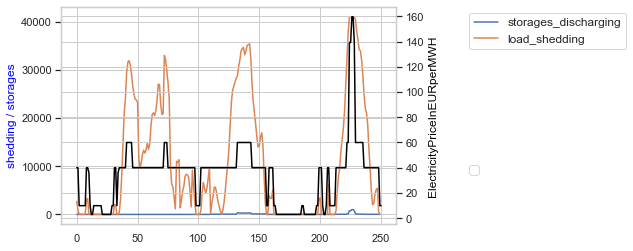

In [53]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
load_generation.iloc[0:250,[2,4]].plot( ax=ax1)
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2,    1))
ax2.legend(['ElectricityPriceInEURperMWH'],fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 0.3))
ax2.plot(ElectricityPriceInEURperMWH.loc[0:250] , color = "black")
ax1.set_ylabel('shedding / storages',  color = "blue")
ax2.set_ylabel('ElectricityPriceInEURperMWH', color = "black")
fig.savefig(path_to_plots + '/' + 'storages_loadshedding.png', bbox_inches='tight', dpi=300)

In [54]:
# plt.stackplot( load_generation.index, load_generation.res, load_generation.conventionals, load_generation.load_shedding, load_generation.storages_discharging,
#               load_generation.storages_discharging,  labels=['RES', 'conventional', "load shedding", "dish", "charg"]  )


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


storages GW: 1.7
batteries use GWh: 272.52864005844395
batteries_FLH: 160.31096474026114
production/discharging 1.0


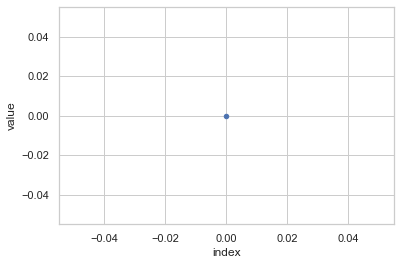

In [55]:
storages = 1
if storages != None:
    path_to_storages_raw = os.path.join(path_to_results, "output","raw","StorageTrader.csv")
    storages_raw = pd.read_csv(path_to_storages_raw, sep=";") 
    storages_results["InstalledPowerInMW"].sum()
    #storage_levels_data["value"][1:].plot.scatter() # 
    storage_levels_data.reset_index().plot.scatter(x = 'index', y = 'value')
    production = storages_results['PRODUCTION_IN_MWH'].sum()
    discharging = generation_data["storages_discharging"].sum()
    charging = generation_data["storages_charging"].sum()

    print("storages GW: " + str(storages_data["InstalledPowerInMW"].sum()/1000))
    
    total_battery_use = load_generation["storages_discharging"].sum()
    print("batteries use GWh: " + str(total_battery_use/1000))
    
    batteries_FLH = (total_battery_use/storages_data["InstalledPowerInMW"].sum())
    print("batteries_FLH: " + str(batteries_FLH)) 
    print("production/discharging "+ str(production/discharging) )
    discharging/charging

In [56]:
#this only work when there is one battery!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# storages_bids_discharge = storages_raw["OfferedDischargePriceInEURperMWH"].dropna()
# storages_bids_discharge.reset_index(drop=True, inplace = True)
# storages_bids_charge = storages_raw["OfferedChargePriceInEURperMWH"].dropna()
# storages_bids_charge.reset_index(drop=True, inplace = True)
# storages_bids_charge.sort_values(ignore_index=True).plot()

# AwardedDischargePowerInMWH = storages_raw["AwardedDischargePowerInMWH"].dropna()
# AwardedDischargePowerInMWH.reset_index(drop=True, inplace = True)
# plt.scatter(x = ElectricityPriceInEURperMWH , y= AwardedDischargePowerInMWH )
# plt.legend()
# plt.xlabel("ElectricityPriceInEURperMWH")
# plt.ylabel("AwardedDischargePowerInMWH")
# plt.savefig(path_to_plots + '/' + 'DischargePowervsprices.png', bbox_inches='tight', dpi=300)
# plt.show()
# plt.close()
# x = storages_bids_discharge.values.reshape(-1,1)
# y = storages_bids_charge.values.reshape(-1,1)
# regr = LinearRegression()
# regr.fit(x, y)
# fig = plt.scatter(x, y,  color='black')
# plt.plot(x, regr.predict(x), color='blue', linewidth=3)
# plt.xlabel("ElectricityPriceInEURperMWH")
# plt.ylabel("OfferedDischargePriceInEURperMWH")
# plt.legend()
# plt.show()
# print("Coefficients: \n", regr.coef_)
# fig, ax1 = plt.subplots()
# storages_bids_discharge.loc[8500:8760].plot(color = "blue")
# ElectricityPriceInEURperMWH.loc[8500:8760].plot( color = "black")
# ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


272528.64005844394

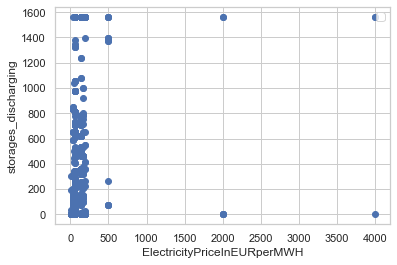

In [57]:
plt.scatter(x = ElectricityPriceInEURperMWH , y= load_generation["storages_discharging"] )
plt.legend()
plt.xlabel("ElectricityPriceInEURperMWH")
plt.ylabel("storages_discharging")
plt.savefig(path_to_plots + '/' + 'BatteriesProductionvsPricesTimeseries.png', bbox_inches='tight', dpi=300)
load_generation["storages_discharging"].sum()

storages_charging      -329.14087
storages_discharging    272.52864


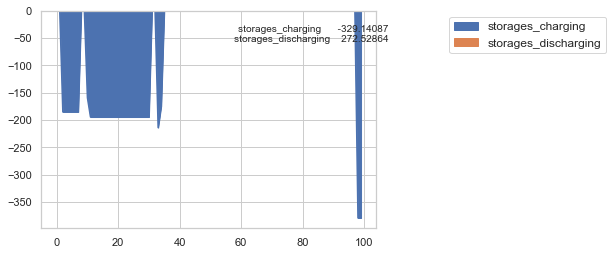

In [58]:
storages = load_generation[["storages_charging", "storages_discharging"]].copy()
sum_storages = storages.sum().divide(1000).to_string()
print(sum_storages)
ax1 = storages.iloc[0:100,:].plot.area()
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
ax1.annotate(sum_storages,
               xy=(0.9, 0.8), xycoords='figure fraction',
               horizontalalignment='right', verticalalignment='top',
               fontsize='small')
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'storages_timeseries.png', bbox_inches='tight', dpi=300)

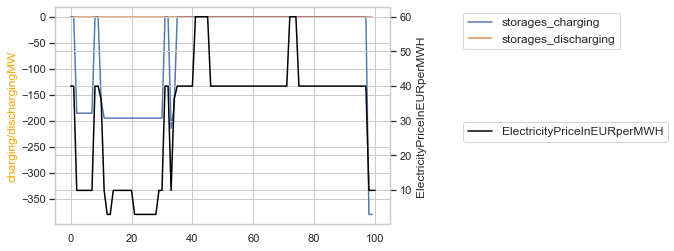

In [59]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
storages.iloc[0:100,:].plot( ax=ax1, alpha=0.95)
#load_generation.iloc[8000:8120,4].plot( ax=ax1, alpha=0.95)
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.plot(ElectricityPriceInEURperMWH.loc[0:100] , color = "black")
ax1.set_ylabel('charging/dischargingMW',  color = "orange")
ax2.set_ylabel('ElectricityPriceInEURperMWH')
ax2.legend(['ElectricityPriceInEURperMWH'],fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 0.5))
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'storages_timeseries_short.png', bbox_inches='tight', dpi=300)

In [60]:
electrolysisPowerConsumptioninMWh  = load_generation["electrolysis_power_consumption"]

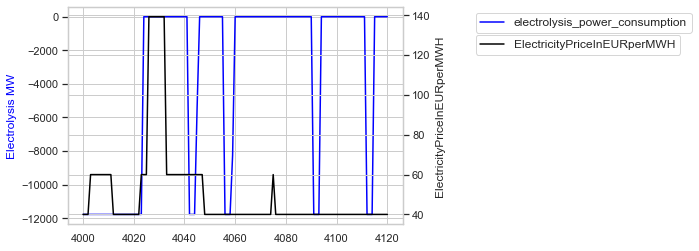

In [61]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
electrolysisPowerConsumptioninMWh = electrolysisPowerConsumptioninMWh*-1
electrolysisPowerConsumptioninMWh.loc[4000:4120].plot( ax=ax1, color = "blue")
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.plot(ElectricityPriceInEURperMWH.loc[4000:4120] , color = "black")
ax1.set_ylabel('Electrolysis MW', color = "blue")
ax2.set_ylabel('ElectricityPriceInEURperMWH')
ax2.legend(['ElectricityPriceInEURperMWH'],fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 0.9))
plt.savefig(path_to_plots + '/' + 'H2vsPricesTimeseries.png', bbox_inches='tight', dpi=300)

<Figure size 432x288 with 0 Axes>

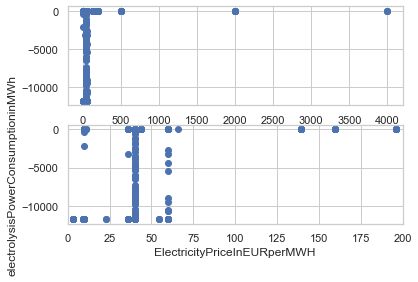

In [62]:
electricityPrice= ElectricityPriceInEURperMWH.values.reshape(-1,1)
electrolysisPower = electrolysisPowerConsumptioninMWh.values.reshape(-1,1)
#fig = plt.scatter(electricityPrice, electrolysisPower)
f = plt.figure()  
fig, axes= plt.subplots(nrows=2, ncols=1)
axes[0].scatter(electricityPrice, electrolysisPower)

axes[1].scatter(electricityPrice, electrolysisPower)
plt.xlim([0, 200])
plt.xlabel("ElectricityPriceInEURperMWH")
plt.ylabel("electrolysisPowerConsumptioninMWh")
plt.savefig(path_to_plots + '/' + 'H2vsPrices.png', bbox_inches='tight', dpi=300)

In [63]:
h2prices = pd.DataFrame(list(zip(ElectricityPriceInEURperMWH, electrolysisPowerConsumptioninMWh)),
              columns =['electricityPrice', 'electrolysisPower'])
h2prices.head()

,electricityPrice,electrolysisPower
0,40.000000,-11775.0
1,40.000000,-11775.0
2,9.929825,-11775.0
3,9.929825,-11775.0
4,9.929825,-11775.0


In [64]:
# h2prices_filtered = h2prices[h2prices["electricityPrice"] < 200]
# ax1 = h2prices_filtered.plot.scatter(x='electricityPrice',
#                        y='electrolysisPower',
#                        c='DarkBlue')
# plt.savefig(path_to_plots + '/' + 'H2vsPricesZoom.png', bbox_inches='tight', dpi=300)
hydrogen_price_limit
merged_df.head()


NameError: name 'merged_df' is not defined

In [ ]:
# LOLE
LOLE = len(load_generation[(load_generation["load_shedding"]>0) & (ElectricityPriceInEURperMWH == 4000)])
hydrogen_not_produced_mwh = load_generation.loc[(load_generation["load_shedding"]>0) & (ElectricityPriceInEURperMWH <=hydrogen_price_limit) 
                                                ,"load_shedding"]
industrial_not_produced_mwh = load_generation.loc[(load_generation["load_shedding"]>0) & (ElectricityPriceInEURperMWH > industrial_price_limit) 
                                                &(ElectricityPriceInEURperMWH <=industrial_price_limit),"load_shedding"]

industrial_ENS = industrial_not_produced_mwh.sum()
industrial_ENS_gwh = industrial_ENS/1000

hydrogen_ENS = hydrogen_not_produced_mwh.sum()
hydrogen_ENS_gwh = hydrogen_ENS/1000
print(hydrogen_ENS)

In [ ]:
ax1 = load_generation[["load_shedding"]].plot( alpha=0.95)
ax1.annotate("LOLE:" + str(LOLE),
               xy=(0.5, 0.9), xycoords='figure fraction',
               horizontalalignment='right', verticalalignment='bottom',
               fontsize='small')

fig1 = ax1.get_figure()
ax1.set_xlabel("hours")
ax1.set_ylabel("MW")
fig1.savefig(path_to_plots + '/' + 'load_shedding.png', bbox_inches='tight', dpi=300)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
hydrogen_produced_hours.iloc[0:100].plot(ax=ax1)
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2,    1))
filtered_elec = ElectricityPriceInEURperMWH.loc[(load_generation["load_shedding"]>0) & (ElectricityPriceInEURperMWH <=hydrogen_price_limit)]

ax2.plot(ElectricityPriceInEURperMWH.loc[0:100] , color = "black")
ax2.legend(['ElectricityPriceInEURperMWH'],fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 0.3))
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'load_shedding_timeseries.png', bbox_inches='tight', dpi=300)

In [ ]:
#power consumed in MW
H2_produced = load_generation["electrolysis_power_consumption"].sum()/1000
totalH2GWh = round(H2_produced*electrolysers_results.ConversionFactor[0],0)
print("H2_produced_GWh " + str(round(H2_produced,0)))

input_H2_demand_GWh = electrolysers_data.HydrogenProductionTargetInMWH.sum()*12/1000
print("input_H2_demand_GWh " + str(round(input_H2_demand_GWh,0)))

hydrogen_producedin_percent = round((totalH2GWh/input_H2_demand_GWh)*100,2)
print("produced_hydrogen % " +str(hydrogen_producedin_percent))

In [ ]:
produced_hydrogen

In [ ]:
# Input = TWh monthly12901502.5
Input = 12901502.5*12/electrolysers_results.ConversionFactor[0]
hydrogen_monthly = 15505796
hydrogen_yearly = hydrogen_monthly*12

hydrogen_and_industrial_gwh = (input_industrial_demand + hydrogen_monthly*12)/1000 # GWh

produced_industrial = input_industrial_demand - industrial_ENS
produced_hydrogen  =input_hydrogen_demand - hydrogen_ENS

print("hydrogen_and_industrial GWh  " + str(round(hydrogen_and_industrial_gwh,0)))
print("hydrogen produced " + str(produced_hydrogen))
print("industrial produced " + str(produced_industrial))

hydrogen_produced_percent = round(produced_hydrogen /hydrogen_yearly*100,0)
print("hydrogen produced/reality " + str(hydrogen_produced_percent))

hydrogen_capacityfactor = round(produced_hydrogen /input_hydrogen_demand*100,0)
print(hydrogen_capacityfactor)


In [ ]:
industrial_monthly = 53920638 #input (separate demands)
industrial_demand = 46531661# acccording to output
industrial_produced_percent = round(produced_industrial /industrial_demand*100,0)
print("industrial produced/reality " + str(industrial_produced_percent))

# if industry produced from electrolyzer
industrial_produced_percent =hydrogen_producedin_percent

In [ ]:
load_generation['group'] = (load_generation.index // 730)
grouped = load_generation.groupby(['group']).sum()
ax1 = grouped.plot()
ax1.annotate("H2 :" + str(hydrogen_produced_percent ) + "%  Industrial " + str(industrial_produced_percent) + "%",
               xy=(0.5, 0.5), xycoords='figure fraction',
               horizontalalignment='right', verticalalignment='bottom',
               fontsize='small')

ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1))
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'monthly_production.png', bbox_inches='tight', dpi=300)

In [ ]:
grouped["electrolysis_power_consumption"].plot()

In [ ]:
load_generation[["load_shedding"]].sum()

In [ ]:
producedin_percent